In [1]:
import pandas as pd
import numpy as np
from bauer.models import LossAversionModel

In [2]:
g1 = np.array([10])
g2 = np.arange(5., 25, 5)

l1 = np.arange(5., 25, 5)
l2 = np.arange(5., 25, 5)

paradigm = pd.MultiIndex.from_product([g1, g2, l1, l2], names=['gain1', 'gain2', 'loss1', 'loss2']).to_frame(index=False)

paradigm['p1'] = .5
paradigm['p2'] = .5

In [11]:
parameters = {'prior_mu_gains': np.log(1),
              'prior_sd_gains': .1,
              'prior_mu_losses': np.log(10),
              'prior_sd_losses': 10.,
              'evidence_sd_gains': .5,
              'evidence_sd_losses': .25}


In [12]:
n_grid = np.linspace(1, 51, 50)
ev_diff_grid = np.linspace(-50, 50, 50)

In [13]:
model = LossAversionModel(magnitude_grid=n_grid, ev_diff_grid=ev_diff_grid, normalize_likelihoods=False, fix_prior_sds=False)

In [14]:
data = model.simulate(paradigm, parameters)

In [15]:
data['ev1'] = data['p1'] * data['gain1'] - (1-data['p1']) * data['loss1']
data['ev2'] = data['p2'] * data['gain2'] - (1-data['p2']) * data['loss2']
data['ev_diff'] = data['ev2'] - data['ev1']

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


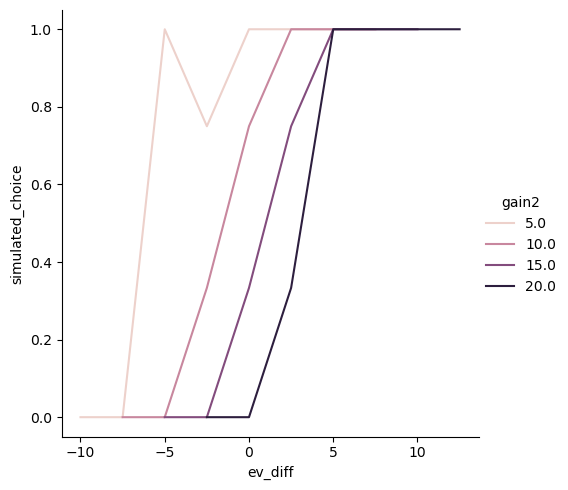

In [16]:
import seaborn as sns
sns.relplot(x='ev_diff', y='simulated_choice', hue='gain2', data=data, kind='line', ci=None)

In [17]:
def get_extra_data_info(data):
    data['ev1'] = data['p1'] * data['gain1'] - (1-data['p1']) * data['loss1']
    data['ev2'] = data['p2'] * data['gain2'] - (1-data['p2']) * data['loss2']
    data['ev_diff'] = data['ev2'] - data['ev1']

    return data


In [29]:
g1 = np.array([10])
g2 = np.arange(5., 50, 4)

l1 = np.arange(5., 50, 4)
l2 = np.arange(5., 50, 4)

paradigm = pd.MultiIndex.from_product([g1, g2, l1, l2], names=['gain1', 'gain2', 'loss1', 'loss2']).to_frame(index=False)

paradigm['p1'] = .5
paradigm['p2'] = .5

In [32]:
from itertools import product
import matplotlib.pyplot as plt
model = LossAversionModel(magnitude_grid=n_grid, ev_diff_grid=ev_diff_grid, normalize_likelihoods=True, fix_prior_sds=True)

parameters = {'prior_mu_gains': np.log(10),
              'prior_sd_gains': 1.,
              'prior_mu_losses': np.log(10),
              'prior_sd_losses': 1.,
              'evidence_sd_gains': .5,
              'evidence_sd_losses': .5}


evidence_sd_losses_iter = [.1, .2, .3, .4, .5]
evidence_sd_losses_iter = [.1, .25, .5]
simulations = np.arange(1, 3)

estimations = []
keys = []

all_data = []

for evidence_sd_losses, simulation in product(evidence_sd_losses_iter, simulations):
    parameters['evidence_sd_losses'] = evidence_sd_losses

    keys.append((evidence_sd_losses, simulation))

    simulated_data = model.simulate(paradigm, parameters, n_samples=1)
    simulated_data['choice'] = simulated_data['simulated_choice']
    simulated_data = get_extra_data_info(simulated_data)
    all_data.append(simulated_data)

    model.build_estimation_model(simulated_data, hierarchical=False)
    estimations.append(model.fit_map())
    

estimations = pd.DataFrame(estimations, index=pd.MultiIndex.from_tuples(keys, names=['evidence_sd_loss', 'stimulation']))
all_data = pd.concat(all_data, keys=pd.MultiIndex.from_tuples(keys, names=['evidence_sd_loss', 'stimulation']))

In [36]:
parameters = {'prior_mu_gains': np.log(10),
              'prior_sd_gains': 1.,
              'prior_mu_losses': np.log(10),
              'prior_sd_losses': 1.,
              'evidence_sd_gains': .5,
              'evidence_sd_losses': .25}

In [37]:
simulated_data = model.simulate(paradigm, parameters, n_samples=1).iloc[::5]
print(simulated_data.shape)
model.build_estimation_model(simulated_data, hierarchical=False)
idata = model.sample(draws=100, chains=4, tune=100)

Only 100 samples in chain.


(346, 7)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior_mu_gains, prior_mu_losses, evidence_sd_gains_untransformed, evidence_sd_losses_untransformed]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 1588 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_13522/1183322717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(idata.posterior['evidence_sd_gains'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_13522/1183322717.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(id

<Axes: xlabel='evidence_sd_losses', ylabel='Density'>

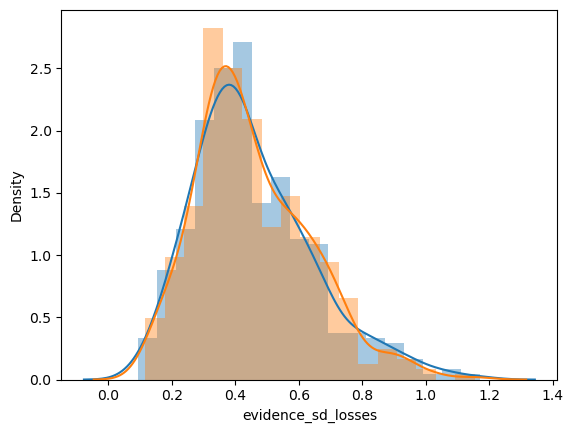

In [43]:
sns.distplot(idata.posterior['evidence_sd_gains'])
sns.distplot(idata.posterior['evidence_sd_losses'])

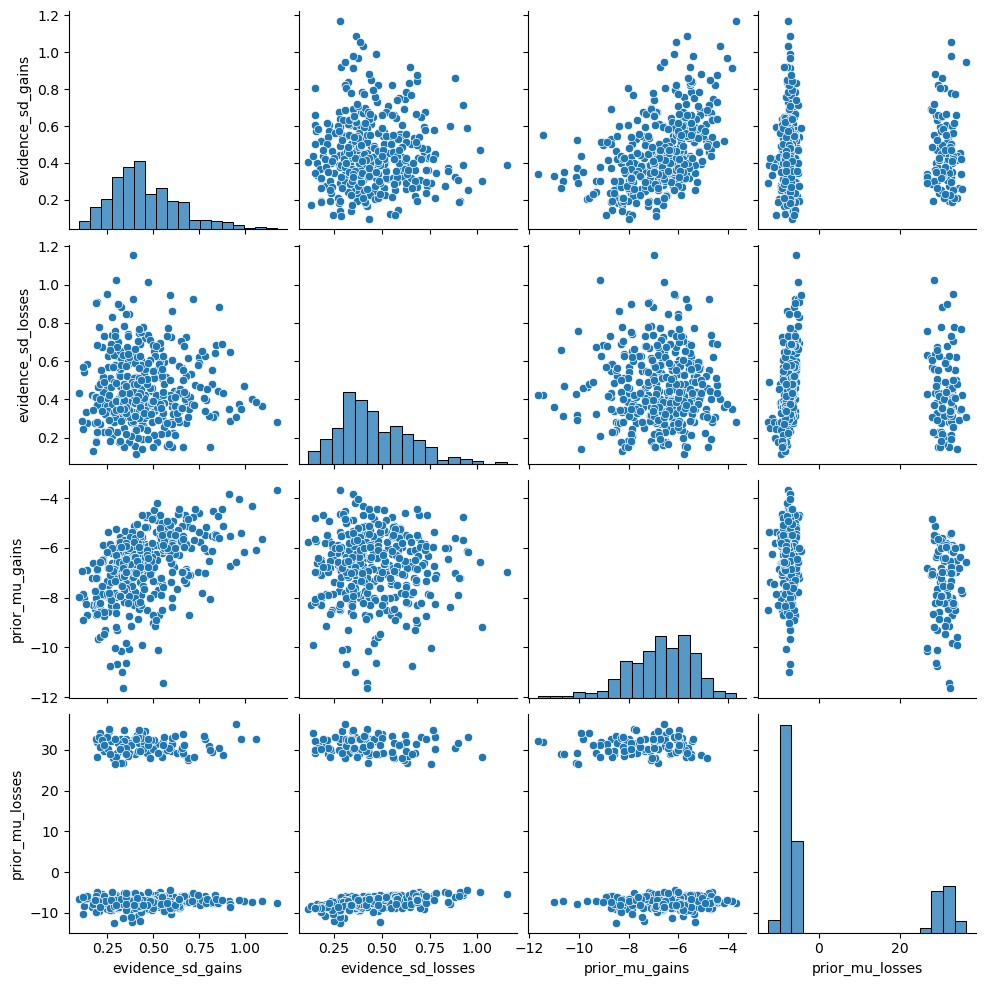

In [46]:
sns.pairplot(idata.posterior[['evidence_sd_gains', 'evidence_sd_losses', 'prior_mu_gains', 'prior_mu_losses']].to_dataframe())

<Axes: >

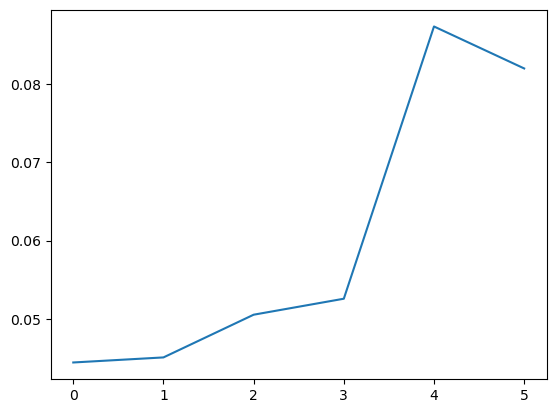

In [49]:
estimations.astype(np.float32).reset_index()['evidence_sd_losses'].plot()

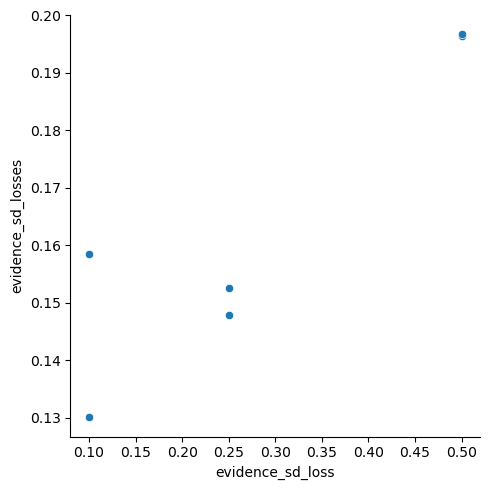

In [24]:
sns.relplot(x='evidence_sd_loss', y='evidence_sd_losses', data=estimations.astype(np.float32).reset_index())

In [ ]:
model.build_estimation_model(simulated_data, hierarchical=False)
model.fit_map()


Size expectations_gains1_mu_log [320]
Size expectations_gains1_sd_log [320]
Size n_grid_log [50]


{'prior_mu_gains': array(8.47179928),
 'prior_mu_losses': array(2.37682864),
 'evidence_sd_gains': array(0.36900256),
 'evidence_sd_losses': array(0.31365706),
 'prior_sd_gains': array(0.51414525),
 'prior_sd_losses': array(1.31769408)}

In [65]:
np.log(10)

2.302585092994046

In [ ]:
np.array([5])[np.newaxis, :]

In [ ]:
model.free_parameters

{'prior_mu_gains': {'mu_intercept': 2.302585092994046,
  'sigma_intercept': 3.0,
  'transform': 'identity'},
 'prior_mu_losses': {'mu_intercept': 2.302585092994046,
  'sigma_intercept': 3.0,
  'transform': 'identity'},
 'evidence_sd_gains': {'mu_intercept': -1.0, 'transform': 'softplus'},
 'evidence_sd_losses': {'mu_intercept': -1.0, 'transform': 'identity'},
 'prior_sd_gains': 1.0,
 'prior_sd_losses': 1.0}